In [2474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2475]:
house = pd.read_csv("data.csv")
house.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


In [2476]:
house.drop_duplicates(inplace=True)

In [2477]:
house.isna().sum()

Price               0
Apartment type      0
Metro station       0
Minutes to metro    0
Region              0
Number of rooms     0
Area                0
Living area         0
Kitchen area        0
Floor               0
Number of floors    0
Renovation          0
dtype: int64

In [2478]:
house

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22670,5884024.0,New building,Котельники,8.0,Moscow region,1.0,44.17,24.5,10.3,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


In [2479]:
house["Region"].value_counts()

Region
Moscow           14773
Moscow region     6068
Name: count, dtype: int64

<Axes: >

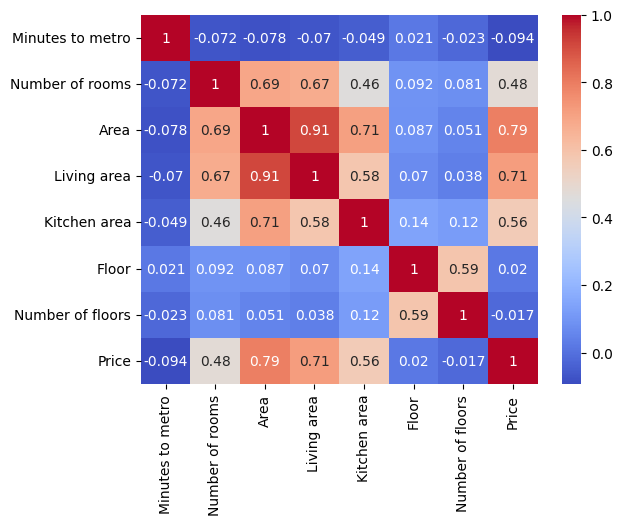

In [2480]:
from matplotlib import colormaps
sns.heatmap(house[["Minutes to metro" , "Number of rooms" , "Area" , "Living area" , "Kitchen area" , "Floor" , "Number of floors" , "Price"]].corr() , annot=True , cmap="coolwarm")

In [2504]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical columns for VIF calculation
numerical_columns = house.select_dtypes(include=[np.number])
x = numerical_columns.copy()

# Calculate VIF
vif_Data = pd.DataFrame()
vif_Data["Feature"] = x.columns
vif_Data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_Data

,Feature,VIF
0,Apartment type,4.647043
1,Minutes to metro,3.414095
2,Region,1.764812
3,Number of rooms,5.752243
4,Area,24.407351
5,Living area,13.557645
6,Kitchen area,7.235968
7,Floor,3.972843
8,Number of floors,6.201677
9,Renovation,2.738042


In [2482]:
from sklearn.preprocessing import LabelEncoder
encoder_dict = {}  
for column in ["Apartment type", "Region", "Renovation"]:
    encoder = LabelEncoder()
    house[column] = encoder.fit_transform(house[column])
    encoder_dict[column] = encoder  
house

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,1,Опалиха,6.0,1,1.0,30.60,11.1,8.5,25.0,25,0
1,9000000.0,1,Павшино,2.0,1,1.0,49.20,20.0,10.0,6.0,15,2
2,11090000.0,1,Мякинино,14.0,1,1.0,44.70,16.2,13.1,10.0,25,0
3,8300000.0,1,Строгино,8.0,1,1.0,35.10,16.0,11.0,12.0,33,2
4,6450000.0,1,Опалиха,6.0,1,1.0,37.70,15.2,4.0,5.0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
22670,5884024.0,0,Котельники,8.0,1,1.0,44.17,24.5,10.3,4.0,17,0
22672,5900000.0,0,Домодедовская,25.0,1,1.0,31.60,10.1,12.2,11.0,15,0
22673,3700000.0,0,Котельники,30.0,1,0.0,18.00,15.0,8.1,17.0,17,0
22674,5768869.0,0,Жулебино,14.0,1,2.0,36.39,22.0,6.6,12.0,14,0


In [2483]:
Metro_Target = house.groupby("Metro station")["Price"].mean()
house["Metro_Target"] = house["Metro station"].map(Metro_Target)
house.drop(columns=["Metro station"] , inplace=True)
house

,Price,Apartment type,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,Metro_Target
0,6300000.0,1,6.0,1,1.0,30.60,11.1,8.5,25.0,25,0,1.129887e+07
1,9000000.0,1,2.0,1,1.0,49.20,20.0,10.0,6.0,15,2,8.619892e+06
2,11090000.0,1,14.0,1,1.0,44.70,16.2,13.1,10.0,25,0,1.552855e+07
3,8300000.0,1,8.0,1,1.0,35.10,16.0,11.0,12.0,33,2,1.486874e+07
4,6450000.0,1,6.0,1,1.0,37.70,15.2,4.0,5.0,5,3,1.129887e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
22670,5884024.0,0,8.0,1,1.0,44.17,24.5,10.3,4.0,17,0,6.804948e+06
22672,5900000.0,0,25.0,1,1.0,31.60,10.1,12.2,11.0,15,0,9.199508e+06
22673,3700000.0,0,30.0,1,0.0,18.00,15.0,8.1,17.0,17,0,6.804948e+06
22674,5768869.0,0,14.0,1,2.0,36.39,22.0,6.6,12.0,14,0,6.128770e+06


In [2484]:
Price = house.pop("Price")
house["Price"] = Price

<Axes: >

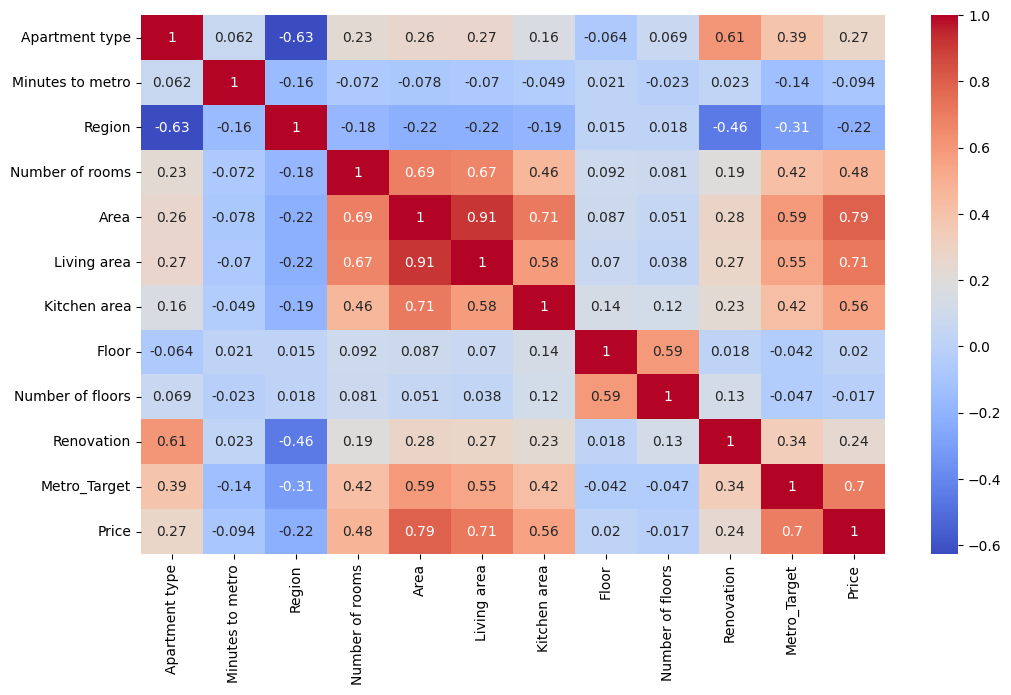

In [2503]:
plt.figure(figsize=(12,7))
sns.heatmap(house.corr() , annot=True , cmap="coolwarm")

In [2486]:
cdf = house[["Area" , "Metro_Target" , "Price"]]
cdf.head()

,Area,Metro_Target,Price
0,30.6,1.129887e+07,6300000.0
1,49.2,8.619892e+06,9000000.0
2,44.7,1.552855e+07,11090000.0
3,35.1,1.486874e+07,8300000.0
4,37.7,1.129887e+07,6450000.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(cdf[["Area" , "Metro_Target"]] , cdf["Price"] , test_size=0.2 , random_state=49 ,shuffle=True)

In [2488]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
print(regr.coef_)
print(regr.intercept_)

[7.42435587e+05 4.96266936e-01]
-34534673.22156427


In [2505]:
from sklearn.metrics import mean_squared_error, r2_score
y_p = regr.predict(X_test)
print(mean_squared_error(y_test, y_p))
print(r2_score(y_test, y_p))

1400992788158925.2
0.7523531827118664
